# Tempo vs. Key Center

A playlist maker wants to discover new music similar to songs and artists they already have in rotation. Most streaming sites will passively spoon-feed them recommendations in a playlist, but they want to see many similar songs they can pick from, with context around what makes them similar so they may actively self guide and customize their discovery journey. 

The user looks over our song scatter plot, with markers visually separated into favorited, listened to, and yet unheard songs. They identify a yet unheard song nearby a group of favorited songs that fit their current mood, and give it a listen. Because math works, a listener just found a new favorite song, and an artist gained a new fan off nothing but the strength of their work. The world returns to its natural order.

# Visualization Details

Began work to create a quick visualization for the music streaming companies. The goal is to create a visual of tempo vs. key center. 

Must Haves:
- The plot displays markers representing at least 20 songs
- The plot draws bpm on the x axis and key on the y axis, or vice versa
- The plot has a black or highly contrasting background
- The markers have annotations saying the song’s name and/or performing artist
- The viz clearly distinguishes between the markers representing different songs

Nice to Haves:
- The explorer may click on a song to download the associated sound file
- The explorer may upload a song to see its marker plotted in the feature viz
    - As a bonus, we can represent a 3rd dimension using the color of the marker
    - The shape of the marker could represent a 4th dimension

Some helpful links:
- Pitch:http://openmusictheory.com/pitch(Class).html#:~:text=Integer%20notation&text=And%20so%20on%3A%20C%20%3D%200,diagram%2C%20like%20the%20one%20below.
- Tempo:https://www.masterclass.com/articles/music-101-what-is-tempo-how-is-tempo-used-in-music#what-are-the-basic-tempo-markings

At the end of each year, Spotify compiles a playlist of the songs streamed most often over the course of that year. 2018's playlist (Top Tracks of 2018) includes 100 songs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spotify_2018 = pd.read_csv('top2018.csv')
print(spotify_2018.columns)

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


# Checking Cleanliness of Key Data

Check the data in the tempo and key columns. According to the documentation found at https://www.kaggle.com/nadintamer/top-spotify-tracks-of-2018/data, the key column data is presented as integers. 

Integers map to pitches using standard pitch class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

In [3]:
spotify_2018['key'].value_counts(dropna = False)

1.0     15
8.0     11
11.0    10
0.0     10
9.0     10
5.0     10
6.0      7
2.0      7
7.0      6
4.0      5
10.0     5
3.0      4
Name: key, dtype: int64

In [4]:
spotify_2018['tempo'].value_counts(dropna = False)

141.971    1
125.905    1
154.983    1
124.946    1
159.847    1
          ..
167.997    1
94.968     1
129.923    1
121.958    1
95.000     1
Name: tempo, Length: 100, dtype: int64

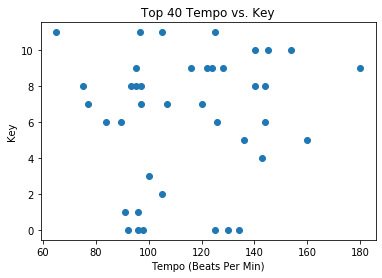

In [5]:
top_40 = spotify_2018.iloc[0:40].copy()

plt.scatter(top_40['tempo'], top_40['key'])
plt.xlabel('Tempo (Beats Per Min)')
plt.ylabel('Key')
plt.title('Top 40 Tempo vs. Key')

plt.show()

The keys 0 and 10 are actually connected. One of the resources linked at the beginning of the notebook explains how the key of 0 (C) preceeds the key of 1 (C#) but also succeeds 10 & 11 (B). Because of this, it might be worthwhile to explore how to create a visualization in a different type of plot, something like polar.

In [6]:
top_40[['name', 'artists', 'key', 'tempo', 'mode']]

,name,artists,key,tempo,mode
0,God's Plan,Drake,7.0,77.169,1.0
1,SAD!,XXXTENTACION,8.0,75.023,1.0
2,rockstar (feat. 21 Savage),Post Malone,5.0,159.847,0.0
3,Psycho (feat. Ty Dolla $ign),Post Malone,8.0,140.124,1.0
4,In My Feelings,Drake,1.0,91.030,1.0
5,Better Now,Post Malone,10.0,145.028,1.0
6,I Like It,Cardi B,5.0,136.048,0.0
7,One Kiss (with Dua Lipa),Calvin Harris,9.0,123.994,0.0
8,IDGAF,Dua Lipa,7.0,97.028,1.0
9,FRIENDS,Marshmello,9.0,95.079,0.0


# Exploratory Visualization

We're going to split the data set up by mode. Mode represents major vs. minor key and is a crucial element in determining the overall feel/mood of a song.

In [7]:
spotify_2018['mode'].value_counts()

1.0    59
0.0    41
Name: mode, dtype: int64

As seen above, 59% of the data set is in mode 1.0, or the major key. The other 41% of the data set is in mode 0.0, or the minor key.

In [8]:
major_songs = spotify_2018[spotify_2018['mode'] == 1.0]
minor_songs = spotify_2018[spotify_2018['mode'] == 0.0]

# Top 40 Data Visualization

For use in aeria pitches. I created a data visualization of the Spotify Top 40 from 2018. The plot is a polar plot in order to show the pitch relation of pitch 11(B) and pitch 0(C). For an MVP (minimum viable product), it is important to show the eventual functionality of aeria. Artists and consumers will be able to identify music similar to music they already enjoy and are interested in. One easy and simple way is by comparing tempo and key. The visualization below is created to show what the consumer experience might be like.

/Users/junchung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.


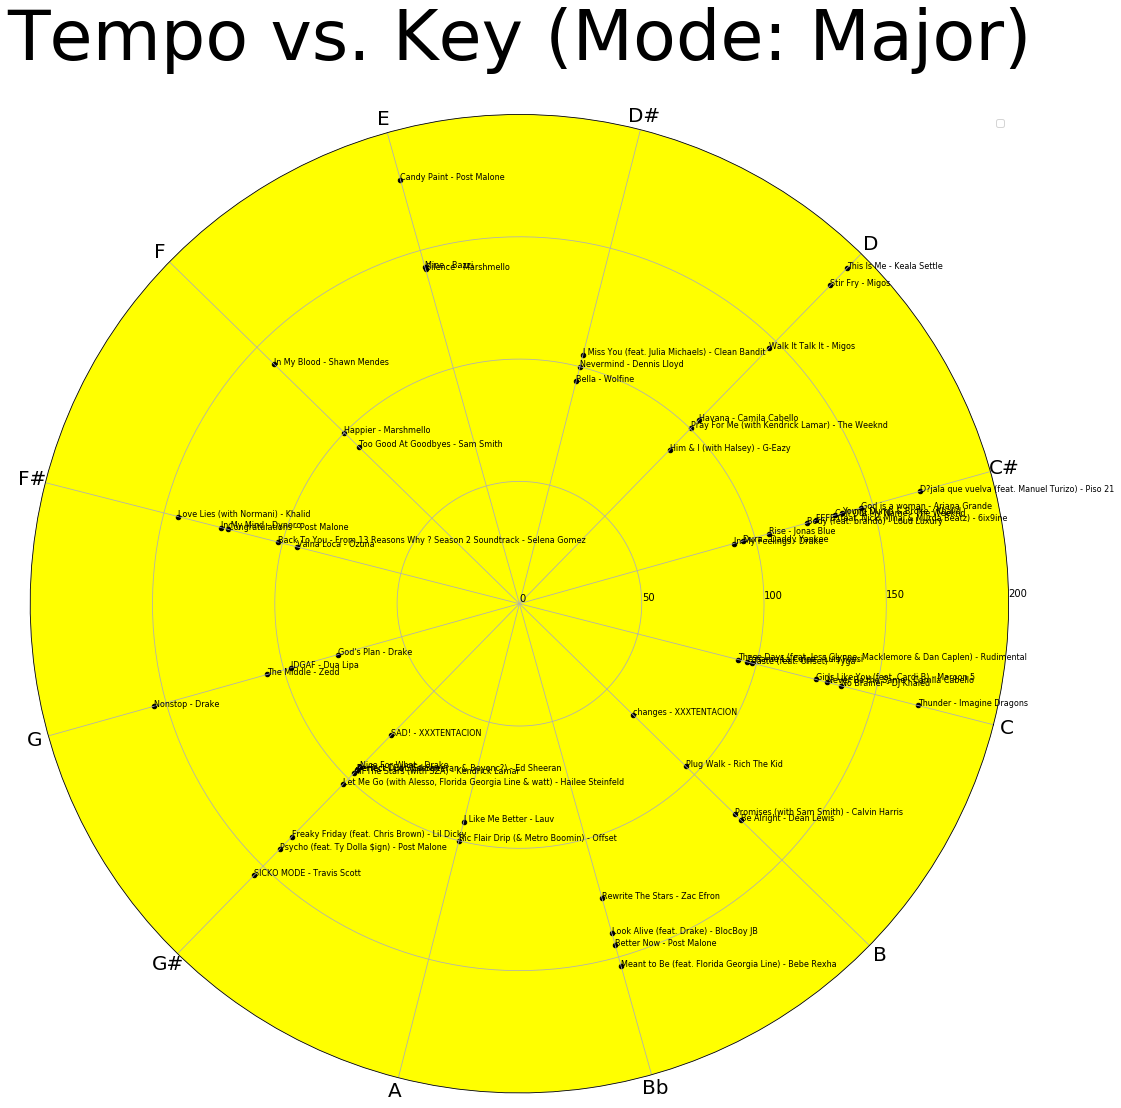

In [9]:
major_songs['converted_key'] = major_songs['key'] / 12 * 2 * np.pi

r = major_songs['tempo']
theta = major_songs['converted_key']
area = 0.05 * r**2
colors = theta

fig = plt.figure(figsize = [18, 18])
ax = fig.add_subplot(111, projection='polar')
ax.scatter(x = theta, y = r, c = 'black', cmap='hsv', alpha=1, s = 20)

ax.set_theta_offset(-0.25)
ax.set_ylim(30, 160)
ax.set_yticks(np.linspace(start = 0, stop = 200, num = 5))
ax.set_rlabel_position(15)
ax.set_xticks(np.linspace(start = 0, stop = 2.0*np.pi, num = 13)[:-1])
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'], size = 20)
ax.set_facecolor('yellow')
rlabels = ax.get_ymajorticklabels()
for label in rlabels:
    label.set_color('black')

for each_row in major_songs.iterrows():
    song_title = each_row[1]['name']
    song_artist = each_row[1]['artists']
    label = song_title + ' - ' + song_artist
    ax.annotate(label, 
                (theta[each_row[0]], r[each_row[0]]), 
                rotation = 0, 
                fontsize = 8 
               ).set_color('black')
    
plt.grid(True)
plt.legend()
plt.title('Tempo vs. Key (Mode: Major)', size = 70)

# make it bigger so dots are more spread out
# use color and size to convey more info later
# CONVERT DEGREE AXIS BACK INTO KEYS
# TRY TO GET KEYS INTO NUMBERS
plt.savefig('major_key_viz.png')

/Users/junchung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
No handles with labels found to put in legend.


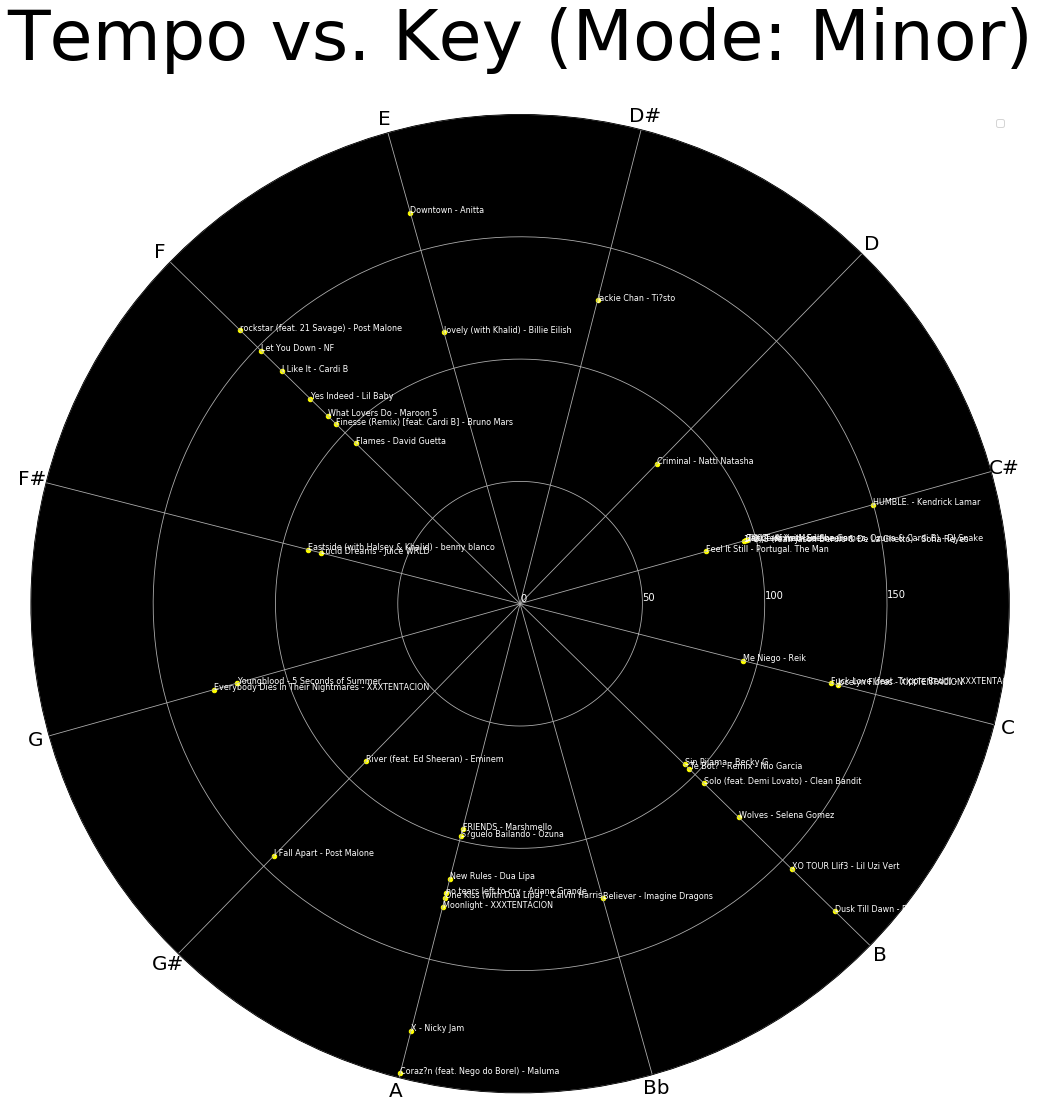

In [10]:
minor_songs['converted_key'] = minor_songs['key'] / 12 * 2 * np.pi

r = minor_songs['tempo']
theta = minor_songs['converted_key']
area = 0.05 * r**2
colors = theta

fig = plt.figure(figsize = [18, 18])
ax = fig.add_subplot(111, projection='polar')
ax.scatter(x = theta, y = r, c = 'yellow', cmap='hsv', alpha=1, s = 20)

ax.set_theta_offset(-0.25)
ax.set_ylim(30, 160)
ax.set_yticks(np.linspace(start = 0, stop = 200, num = 5))
ax.set_rlabel_position(15)
ax.set_xticks(np.linspace(start = 0, stop = 2.0*np.pi, num = 13)[:-1])
ax.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'], size = 20)
ax.set_facecolor('black')
rlabels = ax.get_ymajorticklabels()
for label in rlabels:
    label.set_color('white')

for each_row in minor_songs.iterrows():
    song_title = each_row[1]['name']
    song_artist = each_row[1]['artists']
    label = song_title + ' - ' + song_artist
    ax.annotate(label, 
                (theta[each_row[0]], r[each_row[0]]), 
                rotation = 0, 
                fontsize = 8 
               ).set_color('white')
    
plt.grid(True)
plt.legend()
plt.title('Tempo vs. Key (Mode: Minor)', size = 70)

# make it bigger so dots are more spread out
# use color and size to convey more info later
# CONVERT DEGREE AXIS BACK INTO KEYS
# TRY TO GET KEYS INTO NUMBERS
plt.savefig('minor_key_viz.png')

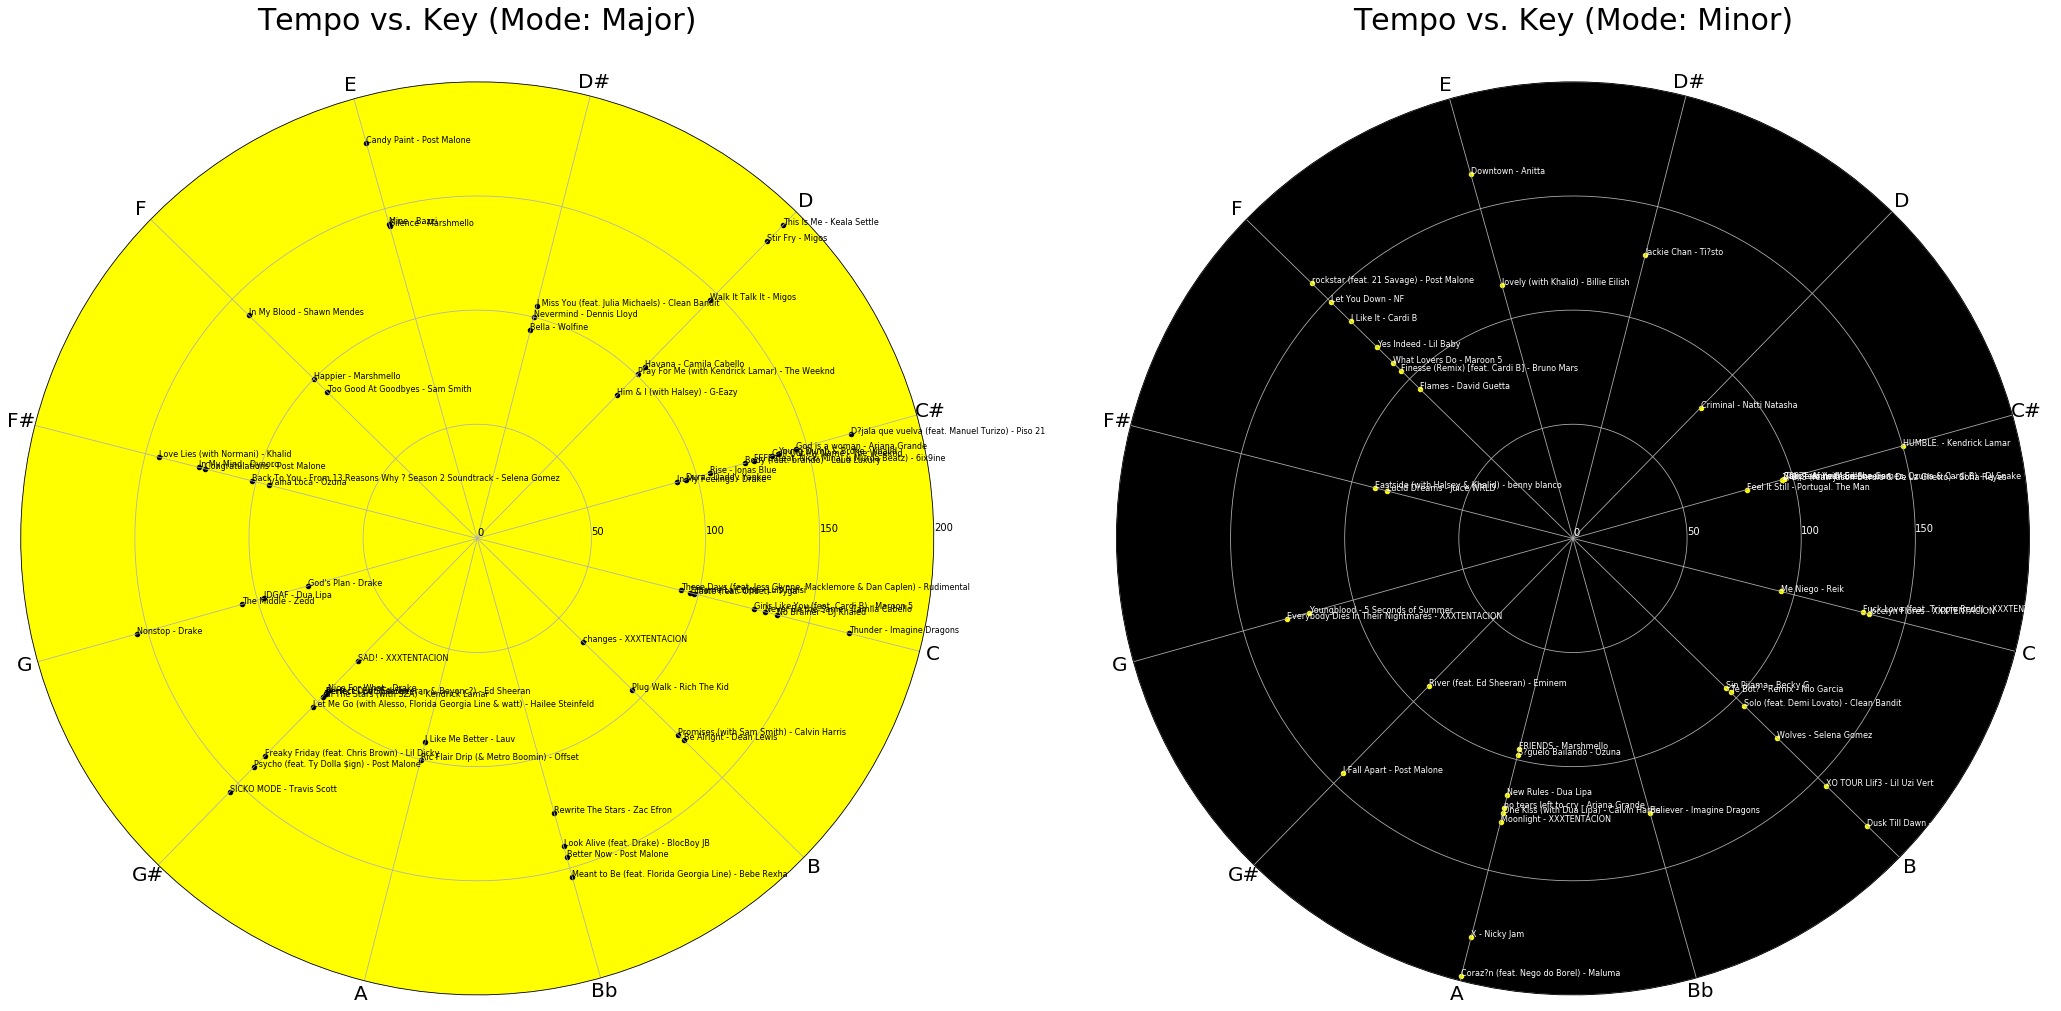

In [13]:
# trying to combine the two plots above into one figure
fig_total = plt.figure(figsize = (36, 36))

# adding the major key plot
r_major = major_songs['tempo']
theta_major = major_songs['converted_key']
area_major = 0.05 * r**2
colors_major = theta_major

ax1 = fig_total.add_subplot(121, projection='polar')
ax1.scatter(x = theta_major, y = r_major, c = 'black', cmap='hsv', alpha=1, s = 20)
ax1.set_theta_offset(-0.25)
ax1.set_ylim(30, 160)
ax1.set_yticks(np.linspace(start = 0, stop = 200, num = 5))
ax1.set_rlabel_position(15)
ax1.set_xticks(np.linspace(start = 0, stop = 2.0*np.pi, num = 13)[:-1])
ax1.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'], size = 20)
ax1.set_facecolor('yellow')
ax1_rlabels = ax1.get_ymajorticklabels()
for label in ax1_rlabels:
    label.set_color('black')
for each_row in major_songs.iterrows():
    r = major_songs['tempo']
    theta = major_songs['converted_key']
    song_title = each_row[1]['name']
    song_artist = each_row[1]['artists']
    label = song_title + ' - ' + song_artist
    ax1.annotate(label, 
                (theta[each_row[0]], r[each_row[0]]), 
                rotation = 0, 
                fontsize = 8 
               ).set_color('black')
ax1.set_title('Tempo vs. Key (Mode: Major)', size = 30)


# adding the minor key plot
r_minor = minor_songs['tempo']
theta_minor = minor_songs['converted_key']
area_minor = 0.05 * r**2
colors_minor = theta_minor

ax2 = fig_total.add_subplot(122, projection='polar') ##### here's where there could be an issue
ax2.scatter(x = theta_minor, y = r_minor, c = 'yellow', cmap='hsv', alpha=1, s = 20)
ax2.set_theta_offset(-0.25)
ax2.set_ylim(30, 160)
ax2.set_yticks(np.linspace(start = 0, stop = 200, num = 5))
ax2.set_rlabel_position(15)
ax2.set_xticks(np.linspace(start = 0, stop = 2.0*np.pi, num = 13)[:-1])
ax2.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'Bb', 'B'], size = 20)
ax2.set_facecolor('black')
ax2_rlabels = ax2.get_ymajorticklabels()
for label in ax2_rlabels:
    label.set_color('white')
for each_row in minor_songs.iterrows():
    r = minor_songs['tempo']
    theta = minor_songs['converted_key']
    song_title = each_row[1]['name']
    song_artist = each_row[1]['artists']
    label = song_title + ' - ' + song_artist
    ax2.annotate(label, 
                (theta[each_row[0]], r[each_row[0]]), 
                rotation = 0, 
                fontsize = 8 
               ).set_color('white')
ax2.set_title('Tempo vs. Key (Mode: Minor)', size = 30)

plt.grid(True)
# plt.legend()
# plt.suptitle('MAJOR vs. MINOR', size = 70)
plt.savefig('major_and_minor_viz.png')